In [ ]:
!pip install pyshp

     |████████████████████████████████| 219 kB 5.2 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=84e633693911dd4ae0079d484d2ce5a7bb9f7a1ff93e4188f2587d25a58f5d46
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
from google.colab import drive
from pathlib import Path
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_dir = 'gdrive/My Drive/Stage/Stage'
base_dir = root_dir
path=Path(base_dir)

In [ ]:
GPSdir = path/'MAGE43FL'

In [ ]:
import shapefile

In [ ]:
fname = 'gdrive/My Drive/Stage/Stage/MAGE43FL/MAGE43FL.shp'

In [ ]:
shape = shapefile.Reader(fname)

In [ ]:
feature = shape.shapeRecords()[0]
first = feature.shape.__geo_interface__  
print(first)

{'type': 'Point', 'coordinates': (-13.417127394876774, 27.090887470342967)}


In [ ]:
len(shape.shapeRecords())

480

In [ ]:
shape.fields

[('DeletionFlag', 'C', 1, 0),
 ['DHSID', 'C', 254, 0],
 ['DHSCC', 'C', 254, 0],
 ['DHSYEAR', 'F', 19, 11],
 ['DHSCLUST', 'F', 19, 11],
 ['CCFIPS', 'C', 254, 0],
 ['ADM1FIPS', 'C', 254, 0],
 ['ADM1FIPSNA', 'C', 254, 0],
 ['ADM1SALBNA', 'C', 254, 0],
 ['ADM1SALBCO', 'C', 254, 0],
 ['ADM1DHS', 'F', 19, 11],
 ['ADM1NAME', 'C', 254, 0],
 ['DHSREGCO', 'F', 19, 11],
 ['DHSREGNA', 'C', 254, 0],
 ['SOURCE', 'C', 254, 0],
 ['URBAN_RURA', 'C', 254, 0],
 ['LATNUM', 'F', 19, 11],
 ['LONGNUM', 'F', 19, 11],
 ['ALT_GPS', 'F', 19, 11],
 ['ALT_DEM', 'F', 19, 11],
 ['DATUM', 'C', 254, 0]]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(shape.records())

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,MA200300000001,MA,2003.0,1.0,MO,MO59,Laayoune-Boujdour-Sakia El Hamra,NULL,NULL,2.0,Laayoune-Boujdou-sakia Al Ham,2.0,laayoune-boujdou-sakia al hamra,GPS,U,27.090887,-13.417127,9999.0,1.0,WGS84
1,MA200300000002,MA,2003.0,2.0,MO,MO59,Laayoune-Boujdour-Sakia El Hamra,NULL,NULL,2.0,Laayoune-Boujdou-sakia Al Ham,2.0,laayoune-boujdou-sakia al hamra,GPS,U,27.157745,-13.189701,9999.0,73.0,WGS84
2,MA200300000003,MA,2003.0,3.0,MO,MO53,Guelmim-Es Smara,NULL,NULL,3.0,Guelmim-Es-smara,3.0,guelmim-es-smara,GPS,U,26.742351,-11.681967,9999.0,162.0,WGS84
3,MA200300000004,MA,2003.0,4.0,MO,MO53,Guelmim-Es Smara,NULL,NULL,3.0,Guelmim-Es-smara,3.0,guelmim-es-smara,GPS,U,26.762514,-11.652784,9999.0,201.0,WGS84
4,MA200300000005,MA,2003.0,5.0,MO,MO53,Guelmim-Es Smara,NULL,NULL,3.0,Guelmim-Es-smara,3.0,guelmim-es-smara,GPS,U,29.170336,-9.718877,9999.0,648.0,WGS84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,MA200300000476,MA,2003.0,476.0,MO,MO57,Tanger-Tetouan,NULL,NULL,16.0,Tanger-Tetouan,16.0,tanger-tetouan,GPS,R,35.546190,-5.927997,9999.0,84.0,WGS84
476,MA200300000477,MA,2003.0,477.0,MO,MO57,Tanger-Tetouan,NULL,NULL,16.0,Tanger-Tetouan,16.0,tanger-tetouan,GPS,R,35.670837,-5.715699,9999.0,39.0,WGS84
477,MA200300000478,MA,2003.0,478.0,MO,MO57,Tanger-Tetouan,NULL,NULL,16.0,Tanger-Tetouan,16.0,tanger-tetouan,GPS,R,35.529244,-5.290912,9999.0,11.0,WGS84
478,MA200300000479,MA,2003.0,479.0,MO,MO57,Tanger-Tetouan,NULL,NULL,16.0,Tanger-Tetouan,16.0,tanger-tetouan,GPS,R,35.690778,-5.483037,9999.0,91.0,WGS84


In [ ]:
df_clean = df[[3,15,16]]

In [ ]:
df_clean = df_clean.rename(columns={3: "HV001", 15: "Latitude", 16: "Longitude"})

In [ ]:
BBox = (df_clean.Longitude.min(),   df_clean.Longitude.max(),df_clean.Latitude.min(), df_clean.Latitude.max())

In [ ]:
BBox

(-13.4171273949, -1.78736162301, 26.7423512124, 35.8588941395)

In [ ]:
df_clean

,HV001,Latitude,Longitude
0,1.0,27.090887,-13.417127
1,2.0,27.157745,-13.189701
2,3.0,26.742351,-11.681967
3,4.0,26.762514,-11.652784
4,5.0,29.170336,-9.718877
...,...,...,...
475,476.0,35.546190,-5.927997
476,477.0,35.670837,-5.715699
477,478.0,35.529244,-5.290912
478,479.0,35.690778,-5.483037


In [ ]:
np.max(df_clean['Longitude'])

-1.78736162301

In [ ]:
ruh_m = plt.imread('gdrive/My Drive/Stage/Stage/MAGE43FL/mapmar.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

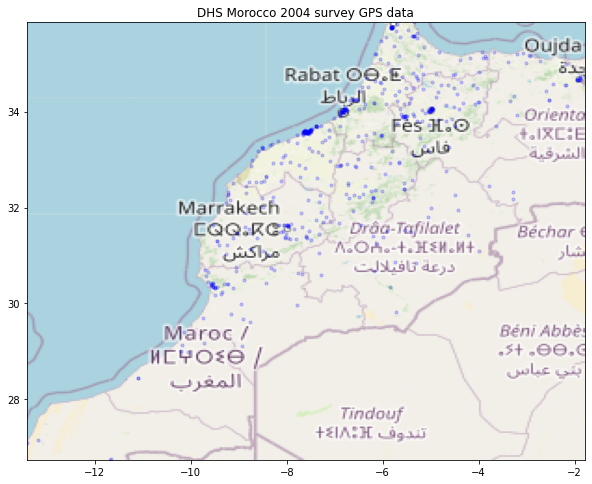

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_clean.Longitude, df_clean.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('DHS Morocco 2004 survey GPS data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.savefig('heatmap.png')
from google.colab import files
files.download('heatmap.png')
plt.show()

In [ ]:
!pip install pyreadstat
import pyreadstat

     |████████████████████████████████| 2.5 MB 5.3 MB/s 


In [ ]:
surveyfile = 'gdrive/My Drive/Stage/Stage/MAHR43SV/MAHR43FL.SAV'

In [ ]:
df_survey, meta = pyreadstat.read_sav(surveyfile)

In [ ]:
df_survey

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV009,HV010,HV011,HV012,HV013,HV014,HV015,HV016,HV017,HV018,HV019,HV020,HV021,HV022,HV023,HV024,HV025,HV026,HV027,HV028,HV030,HV031,HV032,HV033,HV035,HV040,HV041,HV042,HV043,HV044,...,HC57$3,HC57$4,HC57$5,HC57$6,HC58$1,HC58$2,HC58$3,HC58$4,HC58$5,HC58$6,HC60$1,HC60$2,HC60$3,HC60$4,HC60$5,HC60$6,HC61$1,HC61$2,HC61$3,HC61$4,HC61$5,HC61$6,HC62$1,HC62$2,HC62$3,HC62$4,HC62$5,HC62$6,HC63$1,HC63$2,HC63$3,HC63$4,HC63$5,HC63$6,HC64$1,HC64$2,HC64$3,HC64$4,HC64$5,HC64$6
0,1 1,MA4,1.0,1.0,2.0,1.0,793653.0,1.0,2004.0,1249.0,4.0,1.0,NaN,4.0,4.0,1.0,1.0,2.0,1.0,5.0,4.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0,59.0,59.0,2.0,3385.0,1.0,70.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,1 2,MA4,1.0,2.0,2.0,1.0,793653.0,1.0,2004.0,1249.0,5.0,1.0,NaN,5.0,5.0,2.0,1.0,2.0,1.0,6.0,4.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0,59.0,59.0,2.0,3385.0,2.0,64.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,64.0,21.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
2,1 3,MA4,1.0,3.0,2.0,1.0,793653.0,1.0,2004.0,1249.0,6.0,3.0,NaN,6.0,6.0,1.0,1.0,2.0,1.0,38.0,4.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0,59.0,59.0,2.0,3385.0,1.0,70.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1 4,MA4,1.0,4.0,2.0,1.0,793653.0,1.0,2004.0,1249.0,5.0,1.0,NaN,5.0,5.0,0.0,1.0,3.0,1.0,38.0,4.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0,59.0,59.0,2.0,3385.0,0.0,47.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 5,MA4,1.0,5.0,2.0,1.0,793653.0,1.0,2004.0,1249.0,2.0,1.0,NaN,2.0,2.0,0.0,1.0,3.0,1.0,5.0,4.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0,59.0,59.0,2.0,3385.0,0.0,36.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11508,48021,MA4,480.0,21.0,2.0,480.0,1033436.0,11.0,2003.0,1247.0,2.0,1.0,NaN,2.0,2.0,0.0,1.0,29.0,1.0,37.0,5.0,0.0,480.0,232.0,16.0,16.0,2.0,3.0,NaN,0.0,1.0,1.0,2.0,2604.0,0.0,850.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11509,48022,MA4,480.0,22.0,1.0,480.0,1033436.0,11.0,2003.0,1247.0,10.0,2.0,NaN,10.0,10.0,0.0,1.0,28.0,1.0,47.0,5.0,0.0,480.0,232.0,16.0,16.0,2.0,3.0,NaN,0.0,1.0,1.0,2.0,2604.0,0.0,784.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11510,48023,MA4,480.0,23.0,2.0,480.0,1033436.0,11.0,2003.0,1247.0,7.0,2.0,NaN,7.0,7.0,0.0,1.0,28.0,1.0,37.0,5.0,0.0,480.0,232.0,16.0,16.0,2.0,3.0,NaN,0.0,1.0,1.0,2.0,2604.0,0.0,786.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11511,48024,MA4,480.0,24.0,2.0,480.0,1033436.0,11.0,2003.0,1247.0,3.0,1.0,NaN,3.0,3.0,1.0,1.0,28.0,1.0,9.0,5.0,0.0,480.0,232.0,16.0,16.0,2.0,3.0,NaN,0.0,1.0,1.0,2.0,2604.0,1.0,816.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#Wealth index HV270
df_survey_clean = df_survey[['HV001','HV270']]
df_survey_clean

,HV001,HV270
0,1.0,4.0
1,1.0,3.0
2,1.0,3.0
3,1.0,5.0
4,1.0,2.0
...,...,...
11508,480.0,1.0
11509,480.0,2.0
11510,480.0,1.0
11511,480.0,2.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

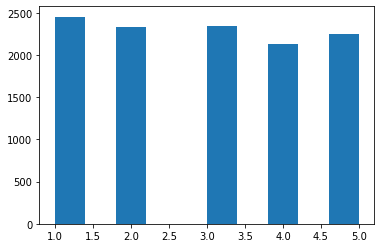

In [ ]:
plt.hist(df_survey_clean['HV270'])
plt.savefig('distribution.png')
from google.colab import files
files.download('distribution.png')
plt.show()

In [ ]:
df_grouped_by = df_survey_clean.groupby(by = 'HV001').median()

In [ ]:
df_grouped_by.idxmax()

HV270    2.0
dtype: float64

In [ ]:
df_clean[df_clean['cluser_number'] == 98.0]

KeyError: ignored

In [ ]:
df_grouped_by

,HV270
HV001,
1.0,3.0
2.0,5.0
3.0,4.0
4.0,3.0
5.0,4.0
...,...
476.0,2.0
477.0,1.0
478.0,2.0


In [ ]:
df_grouped_by.sort_values(by = ['HV270'])

,HV270
HV001,
480.0,1.0
409.0,1.0
328.0,1.0
410.0,1.0
411.0,1.0
...,...
147.0,5.0
152.0,5.0
153.0,5.0


In [ ]:
all_data = df_clean.merge(df_grouped_by, on = 'HV001')

In [ ]:
all_data

,HV001,Latitude,Longitude,HV270
0,1.0,27.090887,-13.417127,3.0
1,2.0,27.157745,-13.189701,5.0
2,3.0,26.742351,-11.681967,4.0
3,4.0,26.762514,-11.652784,3.0
4,5.0,29.170336,-9.718877,4.0
...,...,...,...,...
475,476.0,35.546190,-5.927997,2.0
476,477.0,35.670837,-5.715699,1.0
477,478.0,35.529244,-5.290912,2.0
478,479.0,35.690778,-5.483037,3.0


In [ ]:
all_data.sort_values(by = ['HV270'])

,HV001,Latitude,Longitude,HV270
479,480.0,35.544869,-5.637413,1.0
408,409.0,31.701090,-7.245763,1.0
327,328.0,32.975249,-7.095575,1.0
409,410.0,31.688047,-6.911327,1.0
410,411.0,31.716207,-7.091301,1.0
...,...,...,...,...
146,147.0,33.607609,-7.497776,5.0
151,152.0,33.985844,-6.859229,5.0
152,153.0,33.997938,-6.850607,5.0
120,121.0,33.549255,-7.578140,5.0


In [ ]:
all_data.to_csv(path/'all_data.csv')